# Build basic 2-Layer MLP to solve the xor-Problem

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.2.0+cu92 (from versions: 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.0+cu121.with.pypi.cudnn, 2.1.0+rocm5.5, 2.1.0+rocm5.6, 2.1.1, 2.1.1+cpu, 2.1.1+cpu.cxx11.abi, 2.1.1+cu118, 2.1.1+cu121, 2.1.1+cu121.with.pypi.cudnn, 2.1.1+rocm5.5, 2.1.1+rocm5.6, 2.1.2, 2.1.2+cpu, 2.1.2+cpu.cxx11.abi, 2.1.2+cu118, 2.1.2+cu121, 2.1.2+cu121.with.pypi.cudnn, 2.1.2+rocm5.5, 2.1.2+rocm5.6, 2.2.0, 2.2.0+cpu, 2.2.0+cpu.cxx11.abi, 2.2.0+cu118, 2.2.0+cu121, 2.2.0+rocm5.6, 2.2.0+

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [3]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [4]:
y[y==2]=0
y[y==3]=1

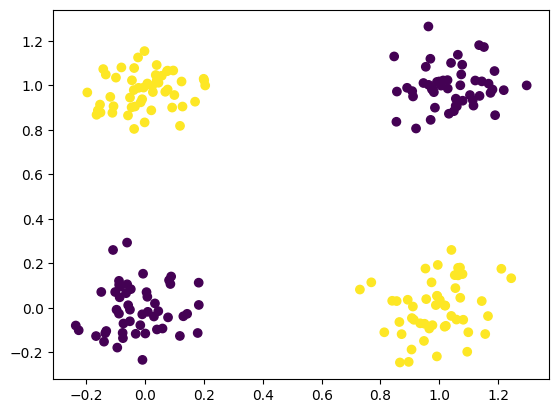

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [6]:
import torch
class MLP(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(2,4,bias=False) #1st layer input dim = 2, output =4 - | input needs to have size of data
        self.fc2 = torch.nn.Linear(4,1,bias=False) #2nd layer input 4 out put 2 | output needs to be one for binary problem
        self.non_linear = torch.nn.Sigmoid() #non-linear activation

    def forward(self, x): #build network
        output = self.fc1(x) #w*X
        output = self.non_linear(output) # activation
        output = self.fc2(output) #w*X
        output = self.non_linear(output) # activation
        return output

In [7]:

from sklearn.model_selection import train_test_split #for test set generation
#split in train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [8]:
print(x_train.shape,y_train.shape)

torch.Size([134, 2]) torch.Size([134])


In [9]:
#get instance of perceptron model
model = MLP()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [10]:
#show model
print(model)

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=False)
  (fc2): Linear(in_features=4, out_features=1, bias=False)
  (non_linear): Sigmoid()
)


In [11]:
model.train() #set to train mode
iterations = 500
for iter in range(iterations):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)

    print('Iter {}: train loss: {}'.format(iter, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()

Iter 0: train loss: 0.701306939125061
Iter 1: train loss: 0.7012723088264465
Iter 2: train loss: 0.701237678527832
Iter 3: train loss: 0.7012032866477966
Iter 4: train loss: 0.701168954372406
Iter 5: train loss: 0.7011348605155945
Iter 6: train loss: 0.7011008858680725
Iter 7: train loss: 0.7010670900344849
Iter 8: train loss: 0.7010334134101868
Iter 9: train loss: 0.7009997963905334
Iter 10: train loss: 0.7009665369987488
Iter 11: train loss: 0.7009332776069641
Iter 12: train loss: 0.700900137424469
Iter 13: train loss: 0.7008672952651978
Iter 14: train loss: 0.7008343935012817
Iter 15: train loss: 0.7008017301559448
Iter 16: train loss: 0.7007691860198975
Iter 17: train loss: 0.7007368206977844
Iter 18: train loss: 0.7007046341896057
Iter 19: train loss: 0.7006725072860718
Iter 20: train loss: 0.7006405591964722
Iter 21: train loss: 0.7006086707115173
Iter 22: train loss: 0.7005770206451416
Iter 23: train loss: 0.7005454897880554
Iter 24: train loss: 0.700514018535614
Iter 25: train 

In [13]:
#test
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int()) /y_test.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(0.7424)
